Exercises from [ML-For Beginners](https://github.com/chewzzz1014/ML-For-Beginners/tree/main/2-Regression/2-Data) by Microsoft

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [59]:
path = "https://raw.githubusercontent.com/chewzzz1014/ML-For-Beginners/main/2-Regression/data/US-pumpkins.csv"
pumpkin = pd.read_csv(path)
pumpkin.head()

,City Name,Type,Package,Variety,Sub Variety,Grade,Date,Low Price,High Price,Mostly Low,...,Unit of Sale,Quality,Condition,Appearance,Storage,Crop,Repack,Trans Mode,Unnamed: 24,Unnamed: 25
0,BALTIMORE,NaN,24 inch bins,NaN,NaN,NaN,4/29/17,270.0,280.0,270.0,...,NaN,NaN,NaN,NaN,NaN,NaN,E,NaN,NaN,NaN
1,BALTIMORE,NaN,24 inch bins,NaN,NaN,NaN,5/6/17,270.0,280.0,270.0,...,NaN,NaN,NaN,NaN,NaN,NaN,E,NaN,NaN,NaN
2,BALTIMORE,NaN,24 inch bins,HOWDEN TYPE,NaN,NaN,9/24/16,160.0,160.0,160.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN
3,BALTIMORE,NaN,24 inch bins,HOWDEN TYPE,NaN,NaN,9/24/16,160.0,160.0,160.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN
4,BALTIMORE,NaN,24 inch bins,HOWDEN TYPE,NaN,NaN,11/5/16,90.0,100.0,90.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN


## Extract Month and Clean Data

In [60]:
pumpkin.shape[0]

1757

In [61]:
# extract month to new column (the date format is MM/DD/YYYY)

# 1. Check Date column's data type
print("[Initial]Date Column Datatpye:", pumpkin["Date"].dtype)

# 2. Conver Date column to datetime format 
pumpkin["Date"]= pd.to_datetime(pumpkin["Date"])
print("[Converted to Datetime]Date Column Datatpye:", pumpkin["Date"].dtype)

# 2. change date format
pumpkin["Date"] = pumpkin["Date"].dt.strftime("%Y-%m-%d")
print("[Changed Date Format]Date Column Datatpye:", pumpkin["Date"].dtype)
# note that datatype changed to obj again. So let's convert to datetime again
pumpkin["Date"]= pd.to_datetime(pumpkin["Date"])

# 3. extract month and put in new col
pumpkin["Month"] = pumpkin["Date"].dt.month

# 4. Have a look
pumpkin.head()

[Initial]Date Column Datatpye: object
[Converted to Datetime]Date Column Datatpye: datetime64[ns]
[Changed Date Format]Date Column Datatpye: object


,City Name,Type,Package,Variety,Sub Variety,Grade,Date,Low Price,High Price,Mostly Low,...,Quality,Condition,Appearance,Storage,Crop,Repack,Trans Mode,Unnamed: 24,Unnamed: 25,Month
0,BALTIMORE,NaN,24 inch bins,NaN,NaN,NaN,2017-04-29,270.0,280.0,270.0,...,NaN,NaN,NaN,NaN,NaN,E,NaN,NaN,NaN,4
1,BALTIMORE,NaN,24 inch bins,NaN,NaN,NaN,2017-05-06,270.0,280.0,270.0,...,NaN,NaN,NaN,NaN,NaN,E,NaN,NaN,NaN,5
2,BALTIMORE,NaN,24 inch bins,HOWDEN TYPE,NaN,NaN,2016-09-24,160.0,160.0,160.0,...,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,9
3,BALTIMORE,NaN,24 inch bins,HOWDEN TYPE,NaN,NaN,2016-09-24,160.0,160.0,160.0,...,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,9
4,BALTIMORE,NaN,24 inch bins,HOWDEN TYPE,NaN,NaN,2016-11-05,90.0,100.0,90.0,...,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,11


In [62]:
# checking for missing data

# number of null values
pumpkin.isnull().sum().sort_values(ascending = False)

# drop all columns except Package, Date, Month, High Price, Low Price
remain = ['Package', 'Date', 'Month', 'Low Price', 'High Price']
pumpkin = pumpkin.drop([c for c in pumpkin.columns if c not in remain], axis=1)

pumpkin.head()

,Package,Date,Low Price,High Price,Month
0,24 inch bins,2017-04-29,270.0,280.0,4
1,24 inch bins,2017-05-06,270.0,280.0,5
2,24 inch bins,2016-09-24,160.0,160.0,9
3,24 inch bins,2016-09-24,160.0,160.0,9
4,24 inch bins,2016-11-05,90.0,100.0,11


## Determine Average Price of Pumpkin 

In [63]:
# avg = (high+low)/2
pumpkin["Average Price"] = (pumpkin["Low Price"] + pumpkin["High Price"])/2
pumpkin["Average Price"]

# addition: view average price per month
#pumpkin.groupby("Month")["Average Price"].sum()

0       275.00
1       275.00
2       160.00
3       160.00
4        95.00
         ...  
1752     14.75
1753    275.00
1754    275.00
1755    275.00
1756    275.00
Name: Average Price, Length: 1757, dtype: float64

In [64]:
# or
price = (pumpkin['Low Price'] + pumpkin['High Price']) / 2
price

0       275.00
1       275.00
2       160.00
3       160.00
4        95.00
         ...  
1752     14.75
1753    275.00
1754    275.00
1755    275.00
1756    275.00
Length: 1757, dtype: float64

## Cleaning Package Column

In [65]:
pumpkin["Package"].unique()

array(['24 inch bins', '36 inch bins', '50 lb sacks',
       '1 1/9 bushel cartons', '1/2 bushel cartons',
       '1 1/9 bushel crates', 'bushel cartons', 'bins', '35 lb cartons',
       'each', '20 lb cartons', '50 lb cartons', '40 lb cartons',
       'bushel baskets', '22 lb cartons'], dtype=object)

In [66]:
# select only pumpkins with string bushel in Package column
pumpkin = pumpkin[pumpkin["Package"].str.contains("bushel", case=True, regex=True)]
pumpkin.shape

(415, 6)

In [67]:
pumpkin["Package"].unique()

array(['1 1/9 bushel cartons', '1/2 bushel cartons',
       '1 1/9 bushel crates', 'bushel cartons', 'bushel baskets'],
      dtype=object)

In [68]:
pumpkin

,Package,Date,Low Price,High Price,Month,Average Price
70,1 1/9 bushel cartons,2016-09-24,15.00,15.0,9,15.000
71,1 1/9 bushel cartons,2016-09-24,18.00,18.0,9,18.000
72,1 1/9 bushel cartons,2016-10-01,18.00,18.0,10,18.000
73,1 1/9 bushel cartons,2016-10-01,17.00,17.0,10,17.000
74,1 1/9 bushel cartons,2016-10-08,15.00,15.0,10,15.000
...,...,...,...,...,...,...
1738,1/2 bushel cartons,2016-09-30,15.00,15.0,9,15.000
1739,1/2 bushel cartons,2016-09-30,13.75,15.0,9,14.375
1740,1/2 bushel cartons,2016-09-30,10.75,15.0,9,12.875
1741,1/2 bushel cartons,2016-09-30,12.00,12.0,9,12.000


## Normalize Pricing for Fractional Amount of Bushel

In [69]:
# to show pricing per bushel

pumpkin.loc[pumpkin["Package"].str.contains("1 1/9"), "Price"] = price/(1+ 1/9)

pumpkin.loc[pumpkin["Package"].str.contains("1/2"), "Price"] = price / (1/2)

In [72]:
# note the price diff

# drop Average Price col, since we ady normalized them and put in Price column
pumpkin = pumpkin.drop("Average Price", axis=1)
pumpkin

,Package,Date,Low Price,High Price,Month,Price
70,1 1/9 bushel cartons,2016-09-24,15.00,15.0,9,13.50
71,1 1/9 bushel cartons,2016-09-24,18.00,18.0,9,16.20
72,1 1/9 bushel cartons,2016-10-01,18.00,18.0,10,16.20
73,1 1/9 bushel cartons,2016-10-01,17.00,17.0,10,15.30
74,1 1/9 bushel cartons,2016-10-08,15.00,15.0,10,13.50
...,...,...,...,...,...,...
1738,1/2 bushel cartons,2016-09-30,15.00,15.0,9,30.00
1739,1/2 bushel cartons,2016-09-30,13.75,15.0,9,28.75
1740,1/2 bushel cartons,2016-09-30,10.75,15.0,9,25.75
1741,1/2 bushel cartons,2016-09-30,12.00,12.0,9,24.00


## Visualization

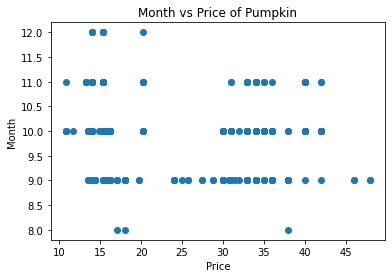

In [74]:
plt.scatter(pumpkin["Price"], pumpkin["Month"]);
plt.xlabel("Price")
plt.ylabel("Month")
plt.title("Month vs Price of Pumpkin");

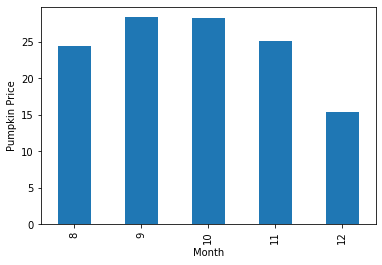

In [76]:
# bar plot

# plot the average price per month
pumpkin.groupby("Month")["Price"].mean().plot(kind="bar")
plt.ylabel("Pumpkin Price");